k-NN Predictions: [1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2]
Fuzzy k-NN Predictions: [2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2,

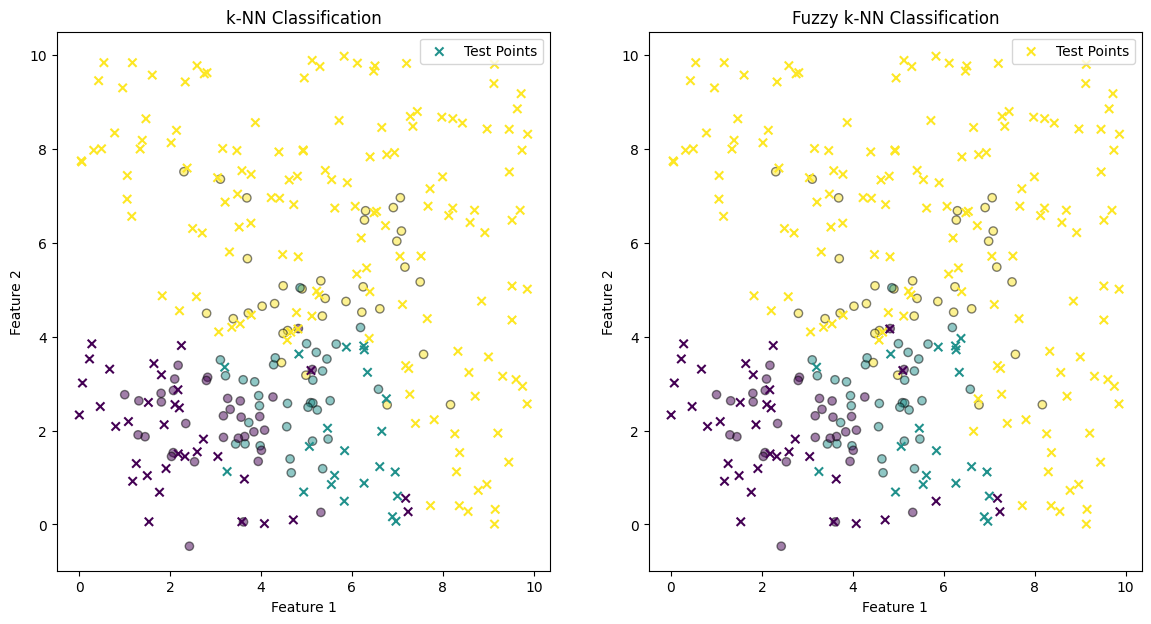

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

# Generate synthetic data
centers = [(3, 2), (5, 3), (5, 5)]
cluster_std = [1.0, 1.0, 1.2]
#np.random.seed(28)
X, y = make_blobs(n_samples=100, centers=centers, cluster_std=cluster_std)

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# k-NN classifier
def knn(data, labels, query, k):
    distances = [(euclidean_distance(point, query), label) for point, label in zip(data, labels)]
    sorted_distances = sorted(distances)[:k]
    labels = [label for _, label in sorted_distances]
    prediction = max(set(labels), key=labels.count)
    return prediction

# Fuzzy k-NN classifier
def fuzzy_knn(data, labels, query, k, m=2):
    distances = [(euclidean_distance(point, query), label) for point, label in zip(data, labels)]
    sorted_distances = sorted(distances)[:k]
    memberships = {cls: 0 for cls in set(labels)}
    total_weight = sum(1 / (dist ** (2 / (m - 1))) for dist, _ in sorted_distances)
    for dist, label in sorted_distances:
        weight = 1 / (dist ** (2 / (m - 1))) / total_weight
        memberships[label] += weight
    predicted_class = max(memberships, key=memberships.get)
    return predicted_class

# Generate hypothetical test points
test_points = np.random.uniform(low=0, high=10, size=(200, 2))

# Classify each test point using both classifiers
k = 3
knn_predictions = [knn(X, y, point, k) for point in test_points]
fuzzy_knn_predictions = [fuzzy_knn(X, y, point, k) for point in test_points]

# Print the predictions
print("k-NN Predictions:", knn_predictions)
print("Fuzzy k-NN Predictions:", fuzzy_knn_predictions)



# Visualization
plt.figure(figsize=(14, 7))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5, edgecolor='k')
plt.scatter(test_points[:, 0], test_points[:, 1], c=knn_predictions, cmap='viridis', marker='x', label='Test Points')
plt.title('k-NN Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot for Fuzzy k-NN
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5, edgecolor='k')
plt.scatter(test_points[:, 0], test_points[:, 1], c=fuzzy_knn_predictions, cmap='viridis', marker='x', label='Test Points')
plt.title('Fuzzy k-NN Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.show()
